## Product Demand Forecasting using Machine Learning

### Objective
To predict product demand using historical sales data and regression models in order to support inventory planning and demand forecasting.

### Approach
- Data cleaning and preprocessing
- Feature engineering from date information
- Regression modeling
- Model evaluation using error metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

plt.rcParams['figure.figsize'] = (8, 5)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("data/sales.csv")
df.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Order_Priority',
       'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Unit_Price', 'Quantity', 'Discount', 'Sales', 'Profit',
       'Payment_Method', 'Returned'],
      dtype='str')

In [3]:
df.shape
df.info()

#Basic Data Check

<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        2000 non-null   str    
 1   Order_Date      2000 non-null   str    
 2   Ship_Date       2000 non-null   str    
 3   Ship_Mode       2000 non-null   str    
 4   Order_Priority  2000 non-null   str    
 5   Customer_ID     2000 non-null   str    
 6   Customer_Name   2000 non-null   str    
 7   Segment         2000 non-null   str    
 8   City            2000 non-null   str    
 9   State           2000 non-null   str    
 10  Postal_Code     2000 non-null   int64  
 11  Region          2000 non-null   str    
 12  Product_ID      2000 non-null   str    
 13  Category        2000 non-null   str    
 14  Sub_Category    2000 non-null   str    
 15  Product_Name    2000 non-null   str    
 16  Unit_Price      2000 non-null   float64
 17  Quantity        2000 non-null   int64  
 18 

In [4]:
df = df[['Order_Date',
        'Ship_Mode',
        'Order_Priority',
        'Segment',
        'Region',
        'Category',
        'Sub_Category',
        'Unit_Price',
        'Discount',
        'Quantity' ]]
df.head()

#keep only useful columns

,Order_Date,Ship_Mode,Order_Priority,Segment,Region,Category,Sub_Category,Unit_Price,Discount,Quantity
0,2025-03-30,Standard Class,High,Consumer,South,Technology,Phones,416.74,0.00,10
1,2026-01-02,Second Class,Critical,Corporate,East,Furniture,Chairs,146.16,0.05,6
2,2025-10-25,Standard Class,High,Home Office,East,Furniture,Furnishings,486.83,0.20,2
3,2023-08-30,Second Class,Low,Home Office,South,Office Supplies,Labels,59.49,0.10,14
4,2025-08-12,Second Class,High,Home Office,South,Technology,Accessories,395.93,0.30,8


In [5]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

#convert Date Column

In [6]:
df['year'] = df['Order_Date'].dt.year
df['month'] = df['Order_Date'].dt.month
df['day'] = df['Order_Date'].dt.day
df['day_of_week'] = df['Order_Date'].dt.dayofweek

#Feature Engineering from Date

In [7]:
df = df.drop('Order_Date', axis=1)

#drop date column

In [8]:
df['Quantity'].describe()

#check target distribution

count    2000.000000
mean        7.991000
std         4.332471
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        15.000000
Name: Quantity, dtype: float64

In [9]:
df = pd.get_dummies(df, drop_first=True)

#Handle Categorical Variables

In [10]:
X = df.drop('Quantity', axis=1)
y = df['Quantity']

#split features and target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#train-test split

In [12]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

#model_1 Linear regression

In [13]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

#model_2 RandomForestRegressor

In [14]:
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n--- {model_name} ---")
    print(f"MAE : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")

    #evalution_functions

In [15]:
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)

#evaluate models


--- Linear Regression ---
MAE : 3.97
RMSE: 4.54

--- Random Forest ---
MAE : 3.98
RMSE: 4.59


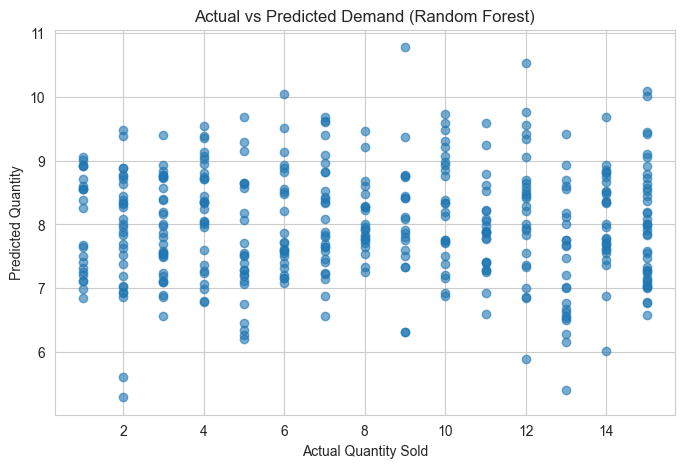

In [16]:
plt.scatter(y_test, rf_pred, alpha=0.6)
plt.xlabel("Actual Quantity Sold")
plt.ylabel("Predicted Quantity")
plt.title("Actual vs Predicted Demand (Random Forest)")
plt.show()

#actual vs predicted visualization

In [17]:
feature_importance = pd.Series(rf_model.feature_importances_,
                               index=X.columns).sort_values(ascending=False)
feature_importance.head(10)

#important feature

Unit_Price                0.201355
day                       0.139548
month                     0.092672
day_of_week               0.076750
Discount                  0.061423
year                      0.053156
Order_Priority_Low        0.020978
Ship_Mode_Second Class    0.020790
Segment_Home Office       0.020213
Segment_Corporate         0.020031
dtype: float64

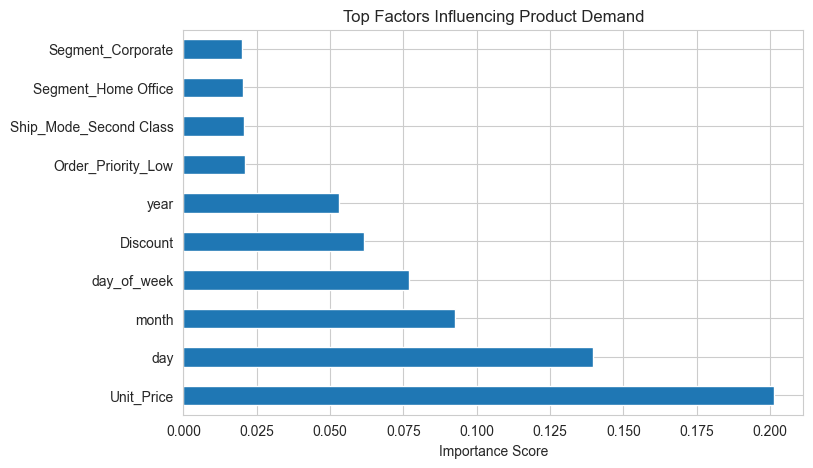

In [18]:
feature_importance.head(10).plot(kind='barh')
plt.title("Top Factors Influencing Product Demand")
plt.xlabel("Importance Score")
plt.show()

#plotting important features

## Conclusion

- Random Forest outperformed Linear Regression by capturing non-linear demand patterns.
- Product category, pricing, discount levels, and temporal features strongly influenced demand.
- The model can assist businesses in inventory planning and demand forecasting.